In [1]:
# Imports

# Pandas
import pandas as pd
from pandas import Series,DataFrame

# Numpy, Matplotlib, Seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error

# Pandas-profiling
from ipywidgets import widgets
from pandas_profiling import ProfileReport

In [44]:
# obtener el archivo de datos como DataFrame
titanic_df = pd.read_csv("data.csv")

In [45]:
# Separar en set de train y test
train_df, test_df = train_test_split(titanic_df, test_size=0.2, random_state=50)

In [4]:
# Visualizar los datos
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
567,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.075,NaN,S
648,649,0,3,"Willey, Mr. Edward",male,NaN,0,0,S.O./P.P. 751,7.550,NaN,S
790,791,0,3,"Keane, Mr. Andrew ""Andy""",male,NaN,0,0,12460,7.750,NaN,Q
618,619,1,2,"Becker, Miss. Marion Louise",female,4.0,2,1,230136,39.000,F4,S
77,78,0,3,"Moutal, Mr. Rahamin Haim",male,NaN,0,0,374746,8.050,NaN,S


In [5]:
# Generar el Profiling Report
profile_train = ProfileReport(
    train_df, title="Train Dataset", html={"style": {"full_width": True}}, sort=None
)
profile_test = ProfileReport(
    test_df, title="Train Dataset", html={"style": {"full_width": True}}, sort=None
)

In [6]:
# Interface
profile_train.to_widgets()
profile_test.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
print(train_df.info())
print("----------------------------")
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 567 to 688
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          566 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        164 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB
None
----------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 558 to 2
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1

In [46]:
# Eliminamos las columnas innecesarias
train_df = train_df.drop(['PassengerId','Name','Ticket'], axis=1)
test_df = test_df.drop(['PassengerId','Name','Ticket'], axis=1)

In [47]:
# Cabin
# Tiene muchos valoes NaN, así que no tendrá gran impacto en las predicciones de este modelo simple
train_df.drop("Cabin",axis=1,inplace=True)
test_df.drop("Cabin",axis=1,inplace=True)

In [48]:
# Eliminamos valores vacíos de la variable objetivo
train_df[~train_df['Survived'].isna()].copy()
test_df[~test_df['Survived'].isna()].copy()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
558,1,1,female,39.0,1,1,79.6500,S
547,1,2,male,NaN,0,0,13.8625,C
494,0,3,male,21.0,0,0,8.0500,S
679,1,1,male,36.0,0,1,512.3292,C
7,0,3,male,2.0,3,1,21.0750,S
...,...,...,...,...,...,...,...,...
756,0,3,male,28.0,0,0,7.7958,S
37,0,3,male,21.0,0,0,8.0500,S
554,1,3,female,22.0,0,0,7.7750,S
459,0,3,male,NaN,0,0,7.7500,Q


In [49]:
# Cambio de tipo
train_df['Fare'] = train_df['Fare'].astype(int)
test_df['Fare'] = test_df['Fare'].astype(int)

In [50]:
# Separamos la variable objetivo antes del encoding
train_target = train_df['Survived'].copy()
test_target = test_df['Survived'].copy()
train_df.drop(columns=['Survived'], inplace=True)
test_df.drop(columns=['Survived'], inplace=True)

In [51]:
# Generación de dummies
train_df = pd.get_dummies(train_df)
test_df = pd.get_dummies(test_df)
# Alineación de train y test para tener las mismas columnas
train_df, test_df = train_df.align(test_df, join='inner', axis=1)

In [52]:
# Volvemos a unir la variable objetivo a los datasets
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)
train_target.reset_index(drop=True, inplace=True)
test_target.reset_index(drop=True, inplace=True)
train_df = train_df.join(train_target)
test_df = test_df.join(test_target)

In [53]:
# Creación de variable Child de tipo booleana
train_df['Child'] = 0
train_df.loc[train_df.Age < 16, 'Child'] = 1
train_df = train_df.copy()
test_df['Child'] = 0
test_df.loc[test_df.Age < 16, 'Child'] = 1
test_df = test_df.copy()

In [54]:
# Separamos la variable objetivo antes de la imputación y escalado
train_target = train_df['Survived'].copy()
test_target = test_df['Survived'].copy()
train_df.drop(columns=['Survived'], inplace=True)
test_df.drop(columns=['Survived'], inplace=True)

In [55]:
# Imputación de nulos

# Creamos el imputador que usará la mediana como sustitutivo
imputer = SimpleImputer(strategy='median')

# Ajustamos las medianas en base a los datos de train
train_df = pd.DataFrame(imputer.fit_transform(train_df), columns=train_df.columns)
# Imputamos los datos de test
test_df = pd.DataFrame(imputer.transform(test_df), columns=test_df.columns)

In [56]:
# Volvemos a unir la variable objetivo a los datasets
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)
train_target.reset_index(drop=True, inplace=True)
test_target.reset_index(drop=True, inplace=True)
train_df = train_df.join(train_target)
test_df = test_df.join(test_target)

In [43]:
# Separación de variables independientes y dependiente
y_train = train_df['Survived']
X_train = train_df.drop(columns=['Survived']).copy()
y_test = test_df['Survived']
X_test = test_df.drop(columns=['Survived']).copy()

In [20]:
# Regresión logística

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

Y_pred = logreg.predict(X_test)

logreg.score(X_train, y_train)

C:\Users\laura\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8075842696629213

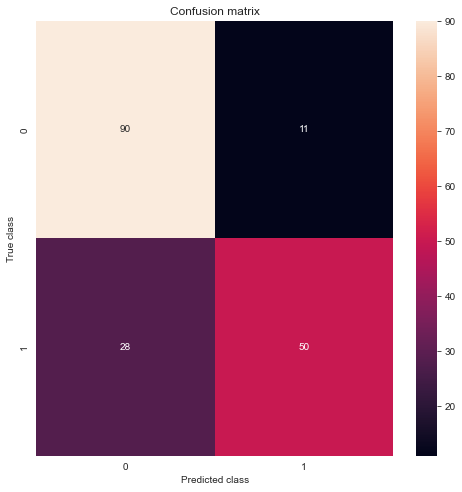

Accuracy: 0.7821229050279329
Precision: 0.819672131147541
Recall: 0.6410256410256411
F1: 0.7194244604316549
AUC score: 0.8578954049251079
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       101
           1       0.82      0.64      0.72        78

    accuracy                           0.78       179
   macro avg       0.79      0.77      0.77       179
weighted avg       0.79      0.78      0.78       179

Error: 0.46677306581685607


In [21]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, Y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# Métricas
print("Accuracy:", accuracy_score(y_test, Y_pred))
print("Precision:", precision_score(y_test, Y_pred))
print("Recall:", recall_score(y_test, Y_pred))
print("F1:", f1_score(y_test, Y_pred))
print("AUC score:", roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1]))
print(classification_report(y_test, Y_pred))
print("Error:", np.sqrt(mean_squared_error(y_test, Y_pred)))

In [57]:
# Support Vector Machines

# En este modelo es necesario hacer escalado

# Separamos la variable objetivo antes del escalado
train_target = train_df['Survived'].copy()
test_target = test_df['Survived'].copy()
train_df.drop(columns=['Survived'], inplace=True)
test_df.drop(columns=['Survived'], inplace=True)

# Objeto de escalado en el rango (0,1)
scaler = MinMaxScaler(feature_range=(0, 1))
# Ajuste y escalado en datos de train
train_df = pd.DataFrame(scaler.fit_transform(train_df), columns=train_df.columns)
# Escalado de datos de test
test_df = pd.DataFrame(scaler.transform(test_df), columns=test_df.columns)

# Volvemos a unir la variable objetivo a los datasets
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)
train_target.reset_index(drop=True, inplace=True)
test_target.reset_index(drop=True, inplace=True)
train_df = train_df.join(train_target)
test_df = test_df.join(test_target)

# Separación de variables independientes y dependiente
y_train = train_df['Survived']
X_train = train_df.drop(columns=['Survived']).copy()
y_test = test_df['Survived']
X_test = test_df.drop(columns=['Survived']).copy()

svc = SVC(probability=True)

svc.fit(X_train, y_train)

Y_pred = svc.predict(X_test)

svc.score(X_train, y_train)

0.8412921348314607

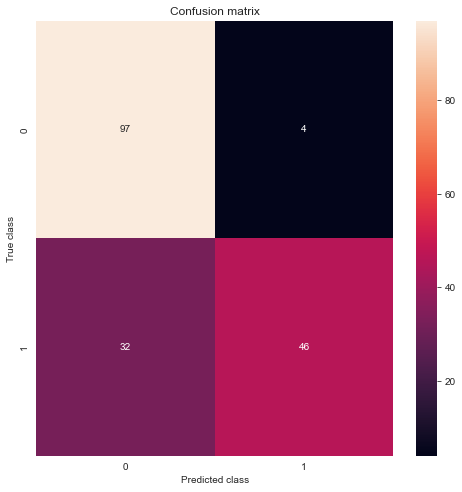

Accuracy: 0.7988826815642458
Precision: 0.92
Recall: 0.5897435897435898
F1: 0.71875
AUC score: 0.8308580858085809
              precision    recall  f1-score   support

           0       0.75      0.96      0.84       101
           1       0.92      0.59      0.72        78

    accuracy                           0.80       179
   macro avg       0.84      0.78      0.78       179
weighted avg       0.83      0.80      0.79       179

Error: 0.4484610556511615


In [58]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, Y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# Métricas
print("Accuracy:", accuracy_score(y_test, Y_pred))
print("Precision:", precision_score(y_test, Y_pred))
print("Recall:", recall_score(y_test, Y_pred))
print("F1:", f1_score(y_test, Y_pred))
print("AUC score:", roc_auc_score(y_test, svc.predict_proba(X_test)[:, 1]))
print(classification_report(y_test, Y_pred))
print("Error:", np.sqrt(mean_squared_error(y_test, Y_pred)))

In [24]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100,max_features=5,random_state=50,n_jobs=-1)

random_forest.fit(X_train, y_train)

Y_pred = random_forest.predict(X_test)

random_forest.score(X_train, y_train)

0.9662921348314607

In [25]:
random_forest.get_params,random_forest.feature_importances_

(<bound method BaseEstimator.get_params of RandomForestClassifier(max_features=5, n_jobs=-1, random_state=50)>,
 array([0.10957015, 0.25053528, 0.04717909, 0.03019936, 0.20139745,
        0.1466757 , 0.15042358, 0.01483454, 0.00937942, 0.01902716,
        0.02077828]))

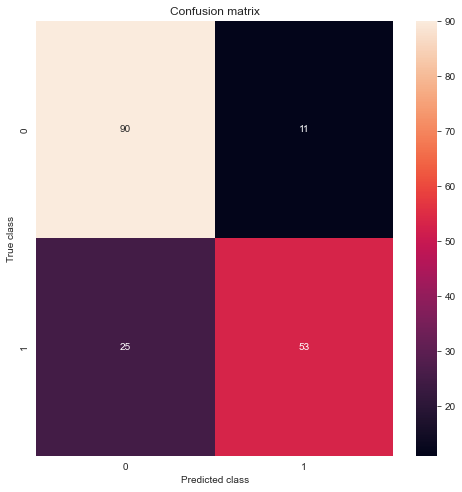

Accuracy: 0.7988826815642458
Precision: 0.828125
Recall: 0.6794871794871795
F1: 0.7464788732394365
AUC score: 0.8467885250063468
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       101
           1       0.83      0.68      0.75        78

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

Error: 0.4484610556511615


In [26]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, Y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# Métricas
print("Accuracy:", accuracy_score(y_test, Y_pred))
print("Precision:", precision_score(y_test, Y_pred))
print("Recall:", recall_score(y_test, Y_pred))
print("F1:", f1_score(y_test, Y_pred))
print("AUC score:", roc_auc_score(y_test, random_forest.predict_proba(X_test)[:, 1]))
print(classification_report(y_test, Y_pred))
print("Error:", np.sqrt(mean_squared_error(y_test, Y_pred)))

In [27]:
# Gradient Boost
grad_boost = GradientBoostingClassifier(n_estimators=1000)
grad_boost.fit(X_train, y_train)
Y_pred = grad_boost.predict(X_test)
grad_boost.score(X_train, y_train)

0.9648876404494382

In [28]:
# Obtener el coeficiente de correlación para cada feature usando Regresión logística
coeff_df = DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Features']
coeff_df["Coefficient Estimate"] = pd.Series(logreg.coef_[0])

# Previsualización
coeff_df

,Features,Coefficient Estimate
0,Age,-0.939036
1,SibSp,-0.018738
2,Parch,-0.437558
3,Fare,-0.233771
4,Sex_female,0.005218
5,Sex_male,1.960969
6,Embarked_C,-0.678161
7,Embarked_Q,0.422778
8,Embarked_S,0.595868
9,Child,0.189203


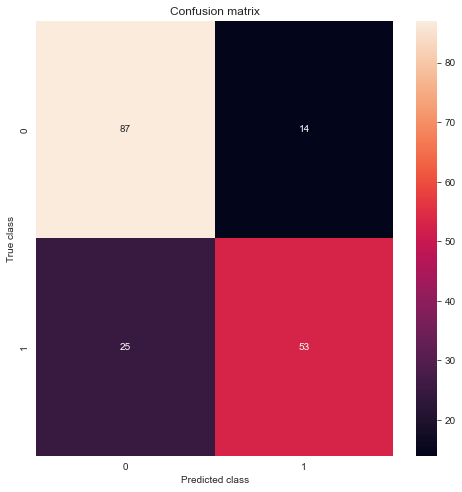

Accuracy: 0.7821229050279329
Precision: 0.7910447761194029
Recall: 0.6794871794871795
F1: 0.7310344827586206
AUC score: 0.8186087839553188
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       101
           1       0.79      0.68      0.73        78

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

Error: 0.46677306581685607


In [29]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, Y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# Métricas
print("Accuracy:", accuracy_score(y_test, Y_pred))
print("Precision:", precision_score(y_test, Y_pred))
print("Recall:", recall_score(y_test, Y_pred))
print("F1:", f1_score(y_test, Y_pred))
print("AUC score:", roc_auc_score(y_test, grad_boost.predict_proba(X_test)[:, 1]))
print(classification_report(y_test, Y_pred))
print("Error:", np.sqrt(mean_squared_error(y_test, Y_pred)))